In [ ]:
!java --version

openjdk 11.0.17 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)


Set up Pyspark



In [ ]:
!pip install pyspark
!pip install findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 50 kB/s 
     |████████████████████████████████| 199 kB 57.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=91e38e7a6f5645e0e837537beadbce007856f88bac051a19b65e1dde071a2ace
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import pyspark
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()
spark

In [ ]:
!pip install pandas_bokeh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyspark.pandas as ps
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_bokeh

In [ ]:
df = spark.read.csv('/content/googleplaystore.csv', header=True, inferSchema=True)

Display top 5 rows of the dataset

In [ ]:
df.show(5)

+--------------------+--------------+------+-------+----+-----------+----+-----+--------------+--------------------+----------------+------------------+------------+
|                 App|      Category|Rating|Reviews|Size|   Installs|Type|Price|Content Rating|              Genres|    Last Updated|       Current Ver| Android Ver|
+--------------------+--------------+------+-------+----+-----------+----+-----+--------------+--------------------+----------------+------------------+------------+
|Photo Editor & Ca...|ART_AND_DESIGN|   4.1|    159| 19M|    10,000+|Free|    0|      Everyone|        Art & Design| January 7, 2018|             1.0.0|4.0.3 and up|
| Coloring book moana|ART_AND_DESIGN|   3.9|    967| 14M|   500,000+|Free|    0|      Everyone|Art & Design;Pret...|January 15, 2018|             2.0.0|4.0.3 and up|
|U Launcher Lite –...|ART_AND_DESIGN|   4.7|  87510|8.7M| 5,000,000+|Free|    0|      Everyone|        Art & Design|  August 1, 2018|             1.2.4|4.0.3 and up|
|Ske

4. Check the last 3 rows of the dataset

In [ ]:
from pyspark.sql.functions import monotonically_increasing_id
from pyspark.sql.functions import desc
 
df2 = df.withColumn("index", monotonically_increasing_id())
df2.orderBy(desc("index")).drop("index").show(3)

+--------------------+-------------------+------+-------+------------------+-----------+----+-----+--------------+-----------------+----------------+------------------+------------------+
|                 App|           Category|Rating|Reviews|              Size|   Installs|Type|Price|Content Rating|           Genres|    Last Updated|       Current Ver|       Android Ver|
+--------------------+-------------------+------+-------+------------------+-----------+----+-----+--------------+-----------------+----------------+------------------+------------------+
|iHoroscope - 2018...|          LIFESTYLE|   4.5| 398307|               19M|10,000,000+|Free|    0|      Everyone|        Lifestyle|   July 25, 2018|Varies with device|Varies with device|
|The SCP Foundatio...|BOOKS_AND_REFERENCE|   4.5|    114|Varies with device|     1,000+|Free|    0|    Mature 17+|Books & Reference|January 19, 2015|Varies with device|Varies with device|
|Parkinson Exercic...|            MEDICAL|   NaN|      3|   

In [ ]:
df.tail(3)

[Row(App='Parkinson Exercices FR', Category='MEDICAL', Rating='NaN', Reviews='3', Size='9.5M', Installs='1,000+', Type='Free', Price='0', Content Rating='Everyone', Genres='Medical', Last Updated='January 20, 2017', Current Ver='1.0', Android Ver='2.2 and up'),
 Row(App='The SCP Foundation DB fr nn5n', Category='BOOKS_AND_REFERENCE', Rating='4.5', Reviews='114', Size='Varies with device', Installs='1,000+', Type='Free', Price='0', Content Rating='Mature 17+', Genres='Books & Reference', Last Updated='January 19, 2015', Current Ver='Varies with device', Android Ver='Varies with device'),
 Row(App='iHoroscope - 2018 Daily Horoscope & Astrology', Category='LIFESTYLE', Rating='4.5', Reviews='398307', Size='19M', Installs='10,000,000+', Type='Free', Price='0', Content Rating='Everyone', Genres='Lifestyle', Last Updated='July 25, 2018', Current Ver='Varies with device', Android Ver='Varies with device')]

5. Find shape of our dataset (number of rows & number of columns)
a. Kindly print in the proper way where one can easily check number of rows
and columns

In [ ]:
print("Total number of rows: ", df.count())
print("Total number of columns: ", len(df.columns))

Total number of rows:  10841
Total number of columns:  13


6. Get information about our dataset like total number rows, total number of
columns, datatypes of each column and memory requirement.
a. Please elaborate in comment section your observation

In [ ]:
#displays the dataschema of dataframe
df.printSchema()
df.dtypes
df.summary()


root
 |-- App: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Rating: string (nullable = true)
 |-- Reviews: string (nullable = true)
 |-- Size: string (nullable = true)
 |-- Installs: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Price: string (nullable = true)
 |-- Content Rating: string (nullable = true)
 |-- Genres: string (nullable = true)
 |-- Last Updated: string (nullable = true)
 |-- Current Ver: string (nullable = true)
 |-- Android Ver: string (nullable = true)



DataFrame[summary: string, App: string, Category: string, Rating: string, Reviews: string, Size: string, Installs: string, Type: string, Price: string, Content Rating: string, Genres: string, Last Updated: string, Current Ver: string, Android Ver: string]

7. Get overall statistics about the data frame
a. Use parameter to show stats of numerical and categorical columns

In [ ]:
df.describe().show()

+-------+--------------------+-------------+-----------+-----------------+------------------+------------------+-----+------------------+--------------+------+-----------------+-------------+------------------+
|summary|                 App|     Category|     Rating|          Reviews|              Size|          Installs| Type|             Price|Content Rating|Genres|     Last Updated|  Current Ver|       Android Ver|
+-------+--------------------+-------------+-----------+-----------------+------------------+------------------+-----+------------------+--------------+------+-----------------+-------------+------------------+
|  count|               10841|        10841|      10841|            10841|             10841|             10841|10841|             10841|         10840| 10841|            10841|        10840|             10840|
|   mean|                null|          1.9|        NaN|444225.1924709356|              null| 2.866666666666667|  NaN|               0.0|          null|  nu

In [ ]:
#check for duplicates rows using pyspark(not pyspark.pandas)

from pyspark.sql import functions as F

cols = df.columns

counts_df = df.select([
    F.countDistinct(*cols).alias('n_unique'),
    F.count('*').alias('n_rows')
])
n_unique, n_rows = counts_df.collect()[0]
print(n_unique)
print(n_rows)

10356
10841


There appears to be duplicated data within dataframe.

In [ ]:
df = df.dropDuplicates()
print("Distinct count: "+str(df.count()))
df.show(truncate=False)

Distinct count: 10358
+-----------------------------------------------------------------------------------------------+-------------------+------+-------+------------------+------------+----+-----+--------------+-----------------------+------------------+------------------+------------------+
|App                                                                                            |Category           |Rating|Reviews|Size              |Installs    |Type|Price|Content Rating|Genres                 |Last Updated      |Current Ver       |Android Ver       |
+-----------------------------------------------------------------------------------------------+-------------------+------+-------+------------------+------------+----+-----+--------------+-----------------------+------------------+------------------+------------------+
|Zona Azul Digital Fácil SP CET - OFFICIAL São Paulo                                            |AUTO_AND_VEHICLES  |4.6   |7880   |Varies with device|100,000+   

In [ ]:
#check again for good measure

from pyspark.sql import functions as F

cols = df.columns

counts_df = df.select([
    F.countDistinct(*cols).alias('n_unique'),
    F.count('*').alias('n_rows')
])
n_unique, n_rows = counts_df.collect()[0]
print(n_unique)
print(n_rows)

10356
10358


In [ ]:
### Get count of null values in pyspark
 
from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+--------+------+-------+----+--------+----+-----+--------------+------+------------+-----------+-----------+
|App|Category|Rating|Reviews|Size|Installs|Type|Price|Content Rating|Genres|Last Updated|Current Ver|Android Ver|
+---+--------+------+-------+----+--------+----+-----+--------------+------+------------+-----------+-----------+
|  0|       0|     0|      0|   0|       0|   0|    0|             1|     0|           0|          1|          1|
+---+--------+------+-------+----+--------+----+-----+--------------+------+------------+-----------+-----------+



One Nan in content rating column

In [ ]:
#drop nulls
df.dropDuplicates(['Content Rating', 'Current Ver', 'Android Ver']).show()

+--------------------+------------------+-----------+-------------+-------------------+----------+------+------------------+---------------+-----------------+------------------+------------------+------------------+
|                 App|          Category|     Rating|      Reviews|               Size|  Installs|  Type|             Price| Content Rating|           Genres|      Last Updated|       Current Ver|       Android Ver|
+--------------------+------------------+-----------+-------------+-------------------+----------+------+------------------+---------------+-----------------+------------------+------------------+------------------+
|Life Made WI-Fi T...|               1.9|         19|         3.0M|             1,000+|      Free|     0|          Everyone|           null|February 11, 2018|            1.0.19|        4.0 and up|              null|
|"Women""s Health ...|              Face|       Body|weight lose)"| HEALTH_AND_FITNESS|       4.2|  2509|              5.0M|     1,000,0

In [ ]:
from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+--------+------+-------+----+--------+----+-----+--------------+------+------------+-----------+-----------+
|App|Category|Rating|Reviews|Size|Installs|Type|Price|Content Rating|Genres|Last Updated|Current Ver|Android Ver|
+---+--------+------+-------+----+--------+----+-----+--------------+------+------------+-----------+-----------+
|  0|       0|     0|      0|   0|       0|   0|    0|             1|     0|           0|          1|          1|
+---+--------+------+-------+----+--------+----+-----+--------------+------+------------+-----------+-----------+



There are 3 nans left code for unknown reason.

Change to Pandas Dataframe

In [ ]:
pdf = ps.DataFrame(df)
pdf.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Zona Azul Digital Fácil SP CET - OFFICIAL São ...,AUTO_AND_VEHICLES,4.6,7880,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 10, 2018",4.6.5,Varies with device
1,English Dictionary - Offline,BOOKS_AND_REFERENCE,4.4,341157,30M,"10,000,000+",Free,0,Everyone 10+,Books & Reference,"March 20, 2018",3.9.1,4.2 and up
2,Learn English for beginners,EDUCATION,4.5,1929,2.5M,"500,000+",Free,0,Everyone,Education,"September 28, 2017",1.1,2.3 and up
3,Babbel – Learn Spanish,EDUCATION,4.4,54798,11M,"1,000,000+",Free,0,Everyone,Education,"July 30, 2018",20.7.2,4.4 and up
4,Sarajevo Film Festival - Official,EVENTS,NaN,6,9.7M,100+,Free,0,Everyone 10+,Events,"July 31, 2018",2.0.1,4.4W and up


In [ ]:
pdf[pdf['App'] == 'Facebook'].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4607,Facebook,SOCIAL,4.1,78128208,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
6781,Facebook,SOCIAL,4.1,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device


In [ ]:
print("Percentage of duplicated data/rows within dataset: ", pdf.duplicated().sum() * 100 / len(pdf))

Percentage of duplicated data/rows within dataset:  0.0


In [ ]:
print("Percentage of Missing data within dataset: ", pdf.isnull().sum() * 100 / len(pdf))

Percentage of Missing data within dataset:  App               0.000000
Category          0.000000
Rating            0.000000
Reviews           0.000000
Size              0.000000
Installs          0.000000
Type              0.000000
Price             0.000000
Content Rating    0.009654
Genres            0.000000
Last Updated      0.000000
Current Ver       0.009654
Android Ver       0.009654
dtype: float64


In [ ]:
pdf.dropna(inplace=True, )

In [ ]:
print("Percentage of Missing data within dataset: ", pdf.isnull().sum() * 100 / len(pdf))

Percentage of Missing data within dataset:  App               0.0
Category          0.0
Rating            0.0
Reviews           0.0
Size              0.0
Installs          0.0
Type              0.0
Price             0.0
Content Rating    0.0
Genres            0.0
Last Updated      0.0
Current Ver       0.0
Android Ver       0.0
dtype: float64


In [ ]:
pdf.drop_duplicates(inplace=True, subset = "App")

In [ ]:
print("Percentage of duplicated data/rows within dataset: ", pdf.duplicated().sum() * 100 / len(pdf))

Percentage of duplicated data/rows within dataset:  0.0


8. Total number of app titles which contain ‘astrology’
a. Show columns names first and find out on which column you have to work
b. Check the column where you can find that word
c. Use contains to find that word
d. Do case sensitive and insensitive search
e. Find the length of data frame by which one can get to know that how many
time this word is used
f. Write your observation


In [ ]:
pdf[pdf['App'].str.contains('Astrology', regex=True)].count()

App               3
Category          3
Rating            3
Reviews           3
Size              3
Installs          3
Type              3
Price             3
Content Rating    3
Genres            3
Last Updated      3
Current Ver       3
Android Ver       3
dtype: int64

In [ ]:
pdf[pdf['App'].str.contains('Astrology', regex=True)].head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9361,Horoscopes – Daily Zodiac Horoscope and Astrology,LIFESTYLE,4.6,161143,11M,"10,000,000+",Free,0,Everyone 10+,Lifestyle,"June 25, 2018",5.2.4(881),4.0.3 and up
9404,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device
3780,သိင်္ Astrology - Min Thein Kha BayDin,LIFESTYLE,4.7,2225,15M,"100,000+",Free,0,Everyone,Lifestyle,"July 26, 2018",4.2.1,4.0.3 and up


The Words "Astrology" is only used 3 times.

9. Find average app rating
a. Show all columns names to find out on which column you have to work
b. Use mean method to find average app rating

In [ ]:
pdf['Rating'] = pdf['Rating'].str.replace('NaN','0.0')
pdf['Rating'] = pdf['Rating'].astype(float)
pdf['Rating'].head()

8222    0.0
8352    4.5
5989    4.6
2125    4.4
3927    0.0
Name: Rating, dtype: float64

Replaced NaN with 0.0

In [ ]:
print("The average application rating is: ", round(pdf['Rating'].mean(), 2))

The average application rating is:  3.54


10. Find total number of unique categories
a. Find names of columns
b. Show how many unique are there

In [ ]:
unique_categories_df = pdf.groupby('Category').count().reset_index()
unique_categories_df2 = unique_categories_df[['Category', 'App']].reset_index()
unique_categories_df3 = unique_categories_df2.rename(columns={'App': 'Total'})
unique_categories_df3 = unique_categories_df3.sort_values(by='Total', ascending=False).reset_index()
unique_categories_df3

,level_0,index,Category,Total
0,15,15,FAMILY,1864
1,18,18,GAME,947
2,22,22,TOOLS,828
3,14,14,BUSINESS,420
4,25,25,MEDICAL,396
5,8,8,PERSONALIZATION,376
6,21,21,PRODUCTIVITY,374
7,23,23,LIFESTYLE,369
8,33,33,FINANCE,345
9,1,1,SPORTS,325


In [ ]:
unique_categories_df3['Category']

0                  FAMILY
1                    GAME
2                   TOOLS
3                BUSINESS
4                 MEDICAL
5         PERSONALIZATION
6            PRODUCTIVITY
7               LIFESTYLE
8                 FINANCE
9                  SPORTS
10          COMMUNICATION
11     HEALTH_AND_FITNESS
12            PHOTOGRAPHY
13     NEWS_AND_MAGAZINES
14                 SOCIAL
15    BOOKS_AND_REFERENCE
16       TRAVEL_AND_LOCAL
17               SHOPPING
18                 DATING
19          VIDEO_PLAYERS
20    MAPS_AND_NAVIGATION
21         FOOD_AND_DRINK
22              EDUCATION
23          ENTERTAINMENT
24      AUTO_AND_VEHICLES
25     LIBRARIES_AND_DEMO
26                WEATHER
27         HOUSE_AND_HOME
28                 EVENTS
29         ART_AND_DESIGN
30              PARENTING
31                 COMICS
32                 BEAUTY
33                   Face
34           traffic jams
Name: Category, dtype: object

/usr/local/lib/python3.8/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_numpy` loads all data into the driver's memory. It should only be used if the resulting NumPy ndarray is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)
/usr/local/lib/python3.8/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_numpy` loads all data into the driver's memory. It should only be used if the resulting NumPy ndarray is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)
/usr/local/lib/python3.8/dist-packages/pyspark/pandas/indexing.py:1362: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if label == key or label[0] == key:


[Text(0.5, 1.0, 'Number of Apps by Category')]

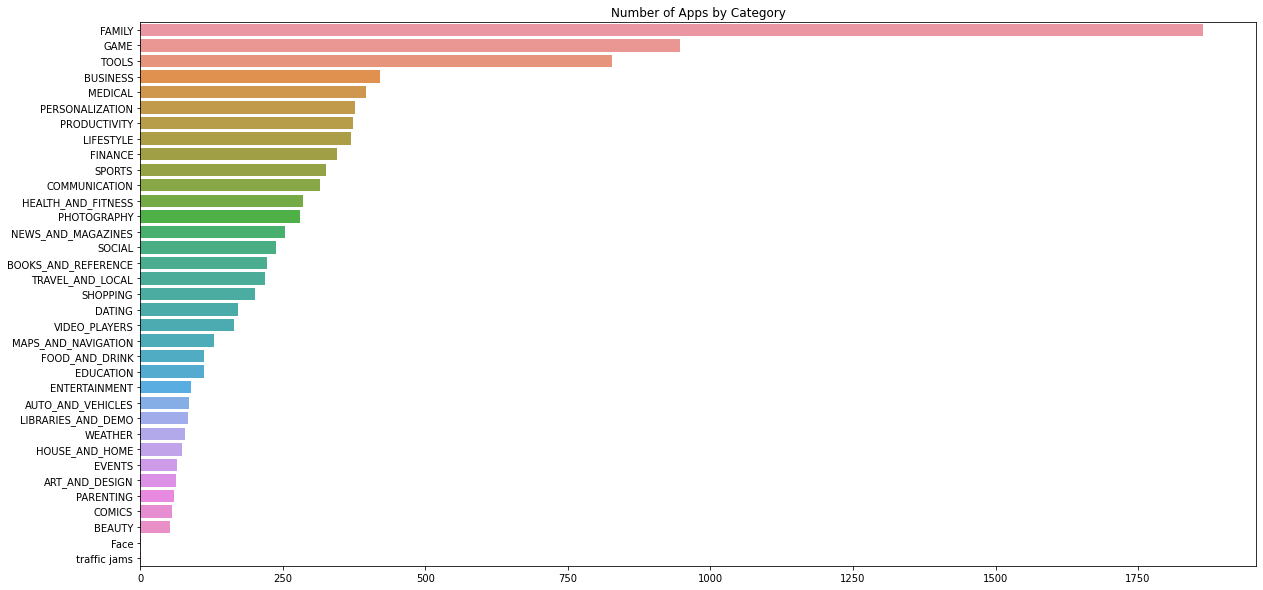

In [ ]:
unique_categories_df3['Total'] = unique_categories_df3['Total'].astype(int)
x = unique_categories_df3['Category'].to_numpy()
y = unique_categories_df3['Total'].to_numpy()
plt.figure(figsize=(20,10))
sns.barplot(x = y, y = x, data = unique_categories_df3).set(title="Number of Apps by Category")

11. Which category getting the highest average rating?
a. Group by the category and mean the rating
b. Sort them by descending order using to find which category has highest
average rating


In [ ]:
highest_avg_rate_by_cat = pdf.groupby(['Category'])['Rating'].mean().reset_index()
highest_avg_rate_by_cat2 = highest_avg_rate_by_cat.rename(columns={'Rating': 'Average_Rating'}).reset_index()
highest_avg_rate_by_cat3 = highest_avg_rate_by_cat2.sort_values(by=["Average_Rating"], ascending = False).reset_index()
highest_avg_rate_by_cat3['Average_Rating'] = highest_avg_rate_by_cat3['Average_Rating'].astype(str)
highest_avg_rate_by_cat3 = highest_avg_rate_by_cat3.drop(['level_0'], axis = 1) 
highest_avg_rate_by_cat4 = highest_avg_rate_by_cat3[~highest_avg_rate_by_cat3.Category.str.contains('Face') & ~highest_avg_rate_by_cat3.Category.str.contains('traffic jams')].reset_index()
highest_avg_rate_by_cat4


,level_0,index,Category,Average_Rating
0,0,20,EDUCATION,4.317857142857143
1,1,34,ART_AND_DESIGN,4.157142857142856
2,2,7,ENTERTAINMENT,4.123595505617976
3,3,18,GAME,4.033051742344248
4,4,2,COMICS,4.0321428571428575
5,5,13,PHOTOGRAPHY,3.890391459074733
6,6,3,WEATHER,3.867088607594936
7,7,16,SHOPPING,3.7693069306930695
8,8,15,FAMILY,3.680579399141636
9,9,4,VIDEO_PLAYERS,3.6731707317073163


Face and Traffic Jams only had 1 app each so there is no way to get an average calculation for them.

/usr/local/lib/python3.8/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_numpy` loads all data into the driver's memory. It should only be used if the resulting NumPy ndarray is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)
/usr/local/lib/python3.8/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_numpy` loads all data into the driver's memory. It should only be used if the resulting NumPy ndarray is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)
/usr/local/lib/python3.8/dist-packages/pyspark/pandas/indexing.py:1362: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if label == key or label[0] == key:


[Text(0.5, 1.0, 'Number of Apps by Category')]

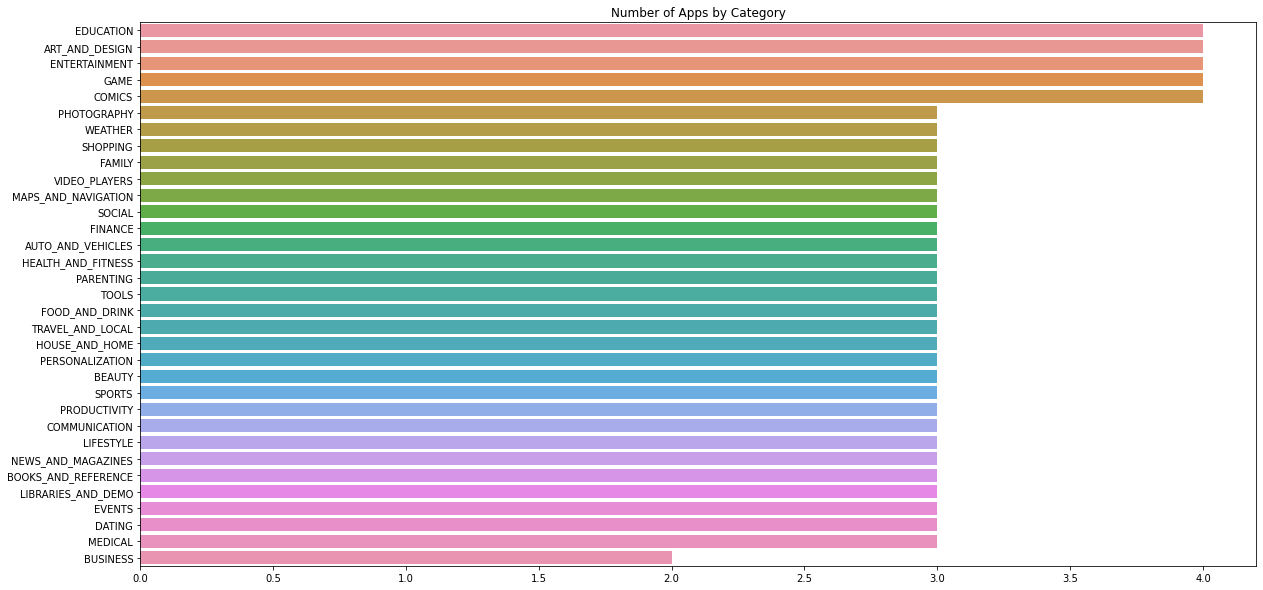

In [ ]:
highest_avg_rate_by_cat4['Average_Rating'] = highest_avg_rate_by_cat4['Average_Rating'].astype(int)
x = highest_avg_rate_by_cat4['Category'].to_numpy()
y = highest_avg_rate_by_cat4['Average_Rating'].to_numpy()
plt.figure(figsize=(20,10))
sns.barplot(x = y, y = x, data = highest_avg_rate_by_cat4).set(title="Number of Apps by Category")

Face and Traffic Jams only had 1 app each so there is no way to get an average calculation for them.

12. Find total number of app having 5-star rating
a. You can compare apps which have 5-star rating or
b. Can use your own any other method
c. Kindly print total numbers in digits

In [ ]:
five_star_rate = pdf[pdf['Rating'] == 5.0].reset_index()
print( 'There are ',five_star_rate['App'].count(), 'Five star apps within the dataset.')

There are  271 Five star apps within the dataset.


In [ ]:
five_stars1 = five_star_rate.groupby(['Category']).count().reset_index()
five_stars2 = five_stars1.sort_values(by=["App"], ascending = False).reset_index()
five_stars3 = five_stars2[['Category', 'App']]
five_stars4 = five_stars3.rename(columns={'index': 'count'}).reset_index()
five_stars4

,index,Category,App
0,0,FAMILY,67
1,1,LIFESTYLE,29
2,2,MEDICAL,25
3,3,BUSINESS,18
4,4,TOOLS,17
5,5,HEALTH_AND_FITNESS,12
6,6,GAME,12
7,7,PERSONALIZATION,10
8,8,PRODUCTIVITY,8
9,9,SOCIAL,8


/usr/local/lib/python3.8/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_numpy` loads all data into the driver's memory. It should only be used if the resulting NumPy ndarray is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)
/usr/local/lib/python3.8/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_numpy` loads all data into the driver's memory. It should only be used if the resulting NumPy ndarray is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)
/usr/local/lib/python3.8/dist-packages/pyspark/pandas/indexing.py:1362: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if label == key or label[0] == key:


[Text(0.5, 1.0, 'Number of Five Star Apps by Category')]

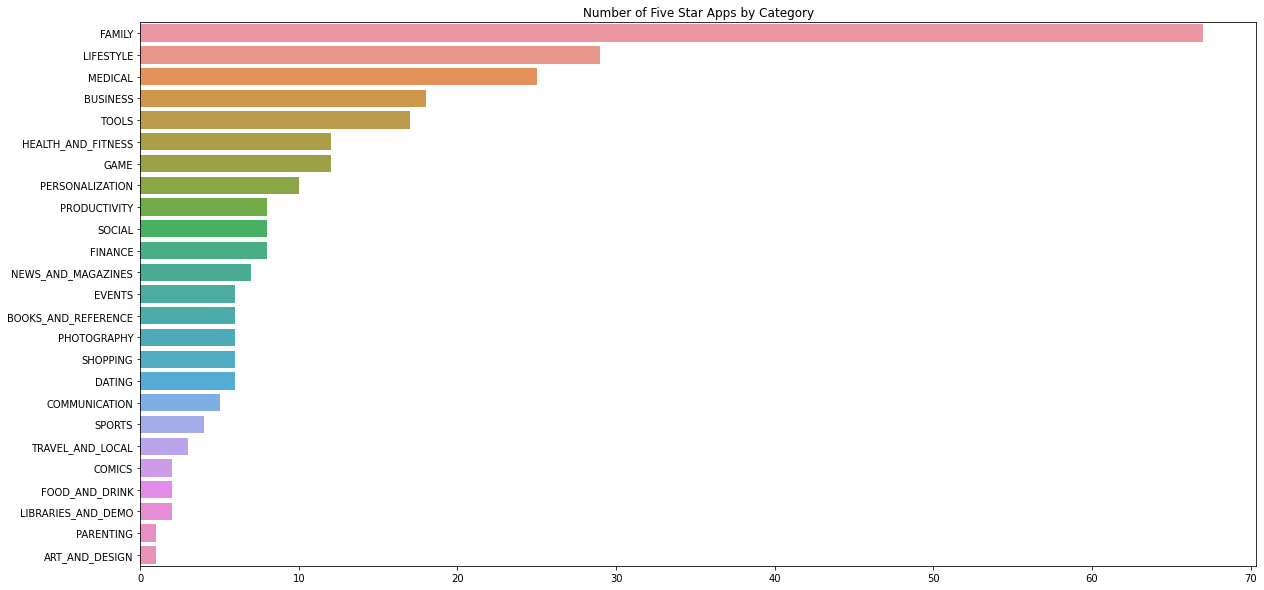

In [ ]:
five_stars4['App'] = five_stars4['App'].astype(int)
x = five_stars4['Category'].to_numpy()
y = five_stars4['App'].to_numpy()
plt.figure(figsize=(20,10))
sns.barplot(x = y, y = x, data = five_stars4).set(title="Number of Five Star Apps by Category")

13. Find average value of reviews
a. Show all columns
b. Find data type of related column
c. Convert data type with integer or float
d. If you find any exception which is stopping, you to convert then keenly check
the exception and solve it
e. After having solution kindly convert data type
f. Time to find average

In [ ]:
pdf['Reviews'] = pdf['Reviews'].astype(int)
print('The average number of reviews per app on google play is :', round(pdf['Reviews'].mean(), 2))

The average number of reviews per app on google play is : 216763.77


14. Find total number of free and paid apps
a. First find out the column on which you must work

In [ ]:
paidapps = pdf[pdf['Type'] == 'Paid'].reset_index()
print('Number of Paid Apps ',paidapps['App'].count(), '    ' ,paidapps['App'].count() * 100 / pdf['App'].count(), '%')

freeapps = pdf[pdf['Type'] == 'Free'].reset_index()
print('Number of Free Apps ',freeapps['App'].count(),'   ' ,freeapps['App'].count() * 100 / pdf['App'].count(), '%', )

Number of Paid Apps  755      7.817353489335266 %
Number of Free Apps  8900     92.15158417891904 %


15. Which app has maximum reviews?
a. Show the name of that app which has maximum reviews

In [ ]:
#Most reviews
highest_reviews = pdf[['App', 'Reviews']].sort_values(by=["Reviews"], ascending = False).reset_index()
highest_reviews.head(20)

,index,App,Reviews
0,4607,Facebook,78128208
1,3231,WhatsApp Messenger,69119316
2,1627,Instagram,66577313
3,6556,Messenger – Text and Video Chat for Free,56642847
4,500,Clash of Clans,44891723
5,8147,Clean Master- Space Cleaner & Antivirus,42916526
6,3326,Subway Surfers,27724094
7,6294,YouTube,25655305
8,7430,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999
9,800,Clash Royale,23125280


In [ ]:
#Least reviews
least_reviews = pdf[['App', 'Reviews']].sort_values(by=["Reviews"], ascending = True).reset_index()
least_reviews.head(20)

,index,App,Reviews
0,5998,14thStreetVet,0
1,5729,1st Fed CI Mobile Banking,0
2,92,23rd QM BDE EO,0
3,4578,25 Mins Ako ay may lobo Etc Pinoy Kid Song Off...,0
4,7068,25WPM Amateur ham radio Koch CW Morse code tra...,0
5,1036,4-T's Bar-BQ & Catering,0
6,3767,4Eternity EO,0
7,6122,A.J. Green Wallpapers 4 Fans,0
8,2231,ABAI CE Scanner,0
9,7782,AC-BL,0


Apps by the Number of Reviews

In [ ]:
zeroreviews = pdf[pdf['Reviews'] == 0].reset_index()
print('Apps with no reviews ',zeroreviews['App'].count(),'   ' ,zeroreviews['App'].count() * 100 / pdf['App'].count(), '%', )

Apps with no reviews  593     6.139987575067302 %


In [ ]:
greaterthan1_reviews = pdf[pdf['Reviews'] >= 1].reset_index()
print('Apps with at least one or more review: ',greaterthan1_reviews['App'].count(),'   ' ,greaterthan1_reviews['App'].count() * 100 / pdf['App'].count(), '%', )

Apps with at least one or more review:  9063     93.83930420376889 %


In [ ]:
fivek_reviews = pdf[pdf['Reviews'] >= 500000].reset_index()
print('Apps with at least on 500000 or more review: ',fivek_reviews['App'].count(),'   ' ,fivek_reviews['App'].count() * 100 / pdf['App'].count(), '%', )

Apps with at least on 500000 or more review:  586     6.067508800993995 %


In [ ]:
eightk_reviews = pdf[pdf['Reviews'] >= 800000].reset_index()
print('Apps with at least on 800000 or more review: ',eightk_reviews['App'].count(),'   ' ,eightk_reviews['App'].count() * 100 / pdf['App'].count(), '%', )

Apps with at least on 800000 or more review:  419     4.338372333816525 %


In [ ]:
ninek_reviews = pdf[pdf['Reviews'] >= 900000].reset_index()
print('Apps with at least on 900000 or more review: ',ninek_reviews['App'].count(),'   ' ,ninek_reviews['App'].count() * 100 / pdf['App'].count(), '%', )

Apps with at least on 900000 or more review:  381     3.9449161317042867 %


In [ ]:
threehundredk_reviews = pdf[(pdf['Reviews'] >= 1) & (pdf['Reviews'] <= 300000)].reset_index()
print('Apps with at least on 300000 or less review: ',threehundredk_reviews['App'].count(),'   ' ,threehundredk_reviews['App'].count() * 100 / pdf['App'].count(), '%', )

Apps with at least on 300000 or less review:  8262     85.54566162766618 %


In [ ]:
three_fivehundredk_reviews = pdf[(pdf['Reviews'] >= 300000) & (pdf['Reviews'] <= 500000)].reset_index()
print('Apps with at least on 300000 to 500000 review: ',three_fivehundredk_reviews['App'].count(),'   ' ,three_fivehundredk_reviews['App'].count() * 100 / pdf['App'].count(), '%', )

Apps with at least on 300000 to 500000 review:  215     2.226133775108718 %


16. Display top 5 apps having highest reviews
a. Try to find out the names of apps after having sort and indexing

In [ ]:
#Most reviews
highest_reviews = pdf[['App', 'Reviews']].sort_values(by=["Reviews"], ascending = False).reset_index()
highest_reviews.head(20)

,index,App,Reviews
0,4607,Facebook,78128208
1,3231,WhatsApp Messenger,69119316
2,1627,Instagram,66577313
3,6556,Messenger – Text and Video Chat for Free,56642847
4,500,Clash of Clans,44891723
5,8147,Clean Master- Space Cleaner & Antivirus,42916526
6,3326,Subway Surfers,27724094
7,6294,YouTube,25655305
8,7430,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999
9,800,Clash Royale,23125280


17. Find average rating of free and paid apps
a. Use mean function for that


In [ ]:
paidappsavgrate = pdf[pdf['Type'] == 'Paid'].reset_index()
print('Average rating of Paid Apps on Google Play Store: ', round(paidappsavgrate['Rating'].mean(), 2))

freeappsavgrate = pdf[pdf['Type'] == 'Free'].reset_index()
print('Average rating of Free Apps on Google Play Store: ', round(freeappsavgrate['Rating'].mean(), 2))

Average rating of Paid Apps on Google Play Store:  3.4
Average rating of Free Apps on Google Play Store:  3.55



18. Display top 5 apps having maximum installs
a. If need convert the data type
b. If required kindly replace values as well
c. Use sorting, indexing , iloc for final output
d. Output should be simple enough in quite easily readable format.

In [ ]:
#clean Installs column
pdf['Installs'] = pdf['Installs'].str.replace('+','')
pdf['Installs'] = pdf['Installs'].str.replace('.','')
pdf['Installs'] = pdf['Installs'].str.replace(',','')
pdf['Installs'] = pdf['Installs'].astype(int)
pdf
pdf.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8222,"""""""i DT"""" Fútbol. Todos Somos Técnicos.""",SPORTS,0.0,27,3.6M,500,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
8352,"""Alphabet """"H"""" Passcode Lock Screen""",PERSONALIZATION,4.5,2,3.0M,100,Free,0,Everyone,Personalization,"December 21, 2017",1.0,4.1 and up
5989,"""Eat Fast Prepare """"Without Internet""""""",FOOD_AND_DRINK,4.6,4925,17M,1000000,Free,0,Everyone,Food & Drink,"June 10, 2018",3.6.6,4.0.3 and up
2125,"""Official QR Code® Reader """"Q""""""",PRODUCTIVITY,4.4,3031,Varies with device,500000,Free,0,Everyone,Productivity,"March 23, 2018",Varies with device,Varies with device
3927,"""The FN """"Baby"""" pistol explained""",BOOKS_AND_REFERENCE,0.0,1,8.8M,10,Paid,$5.99,Everyone,Books & Reference,"September 6, 2015",Android 3.0 - 2015,1.6 and up


In [ ]:
pdf[pdf['App'] == 'Facebook'].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4607,Facebook,SOCIAL,4.1,78128208,Varies with device,1000000000,Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device


In [ ]:
top_five_installs = pdf.sort_values(by=['Installs'], ascending = False).reset_index()
top_five_installs2 = top_five_installs.drop_duplicates()
top_five_installs2.sort_values(by=['Installs'], ascending = False).head(20)

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
11,72,Google+,SOCIAL,4.2,4828372,Varies with device,1000000000,Free,0,Teen,Social,"July 26, 2018",Varies with device,Varies with device
6,114,Google Photos,PHOTOGRAPHY,4.5,10858538,Varies with device,1000000000,Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device
5,117,Google News,NEWS_AND_MAGAZINES,3.9,877643,13M,1000000000,Free,0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up
1,895,Gmail,COMMUNICATION,4.3,4604324,Varies with device,1000000000,Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
4,917,Google Drive,PRODUCTIVITY,4.4,2728941,Varies with device,1000000000,Free,0,Everyone,Productivity,"July 30, 2018",Varies with device,Varies with device
13,1627,Instagram,SOCIAL,4.5,66577313,Varies with device,1000000000,Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
12,1828,Hangouts,COMMUNICATION,4.0,3419249,Varies with device,1000000000,Free,0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device
16,2462,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,Varies with device,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3,2481,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642112,Varies with device,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
18,3231,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device


Extras

In [ ]:
#total count of installs
print('There are ', pdf['Installs'].sum(), ' billion Installs Total.')

75191627513

75,191,627,513 billion

In [ ]:
installsbycategory = pdf.groupby('Category')['Installs'].sum().reset_index()
installsbycategory1 = installsbycategory[['Category', 'Installs']].sort_values(by='Installs', ascending=False).reset_index()
installsbycategory1

,index,Category,Installs
0,18,GAME,13548924415
1,26,COMMUNICATION,11038276251
2,22,TOOLS,8002771915
3,15,FAMILY,6078442505
4,21,PRODUCTIVITY,5788091369
5,32,SOCIAL,5487867902
6,13,PHOTOGRAPHY,4658147655
7,4,VIDEO_PLAYERS,3927002720
8,10,TRAVEL_AND_LOCAL,2894887146
9,24,NEWS_AND_MAGAZINES,2369217760


/usr/local/lib/python3.8/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_numpy` loads all data into the driver's memory. It should only be used if the resulting NumPy ndarray is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)
/usr/local/lib/python3.8/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_numpy` loads all data into the driver's memory. It should only be used if the resulting NumPy ndarray is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)
/usr/local/lib/python3.8/dist-packages/pyspark/pandas/indexing.py:1362: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if label == key or label[0] == key:


[Text(0.5, 1.0, 'Number of Install by Category')]

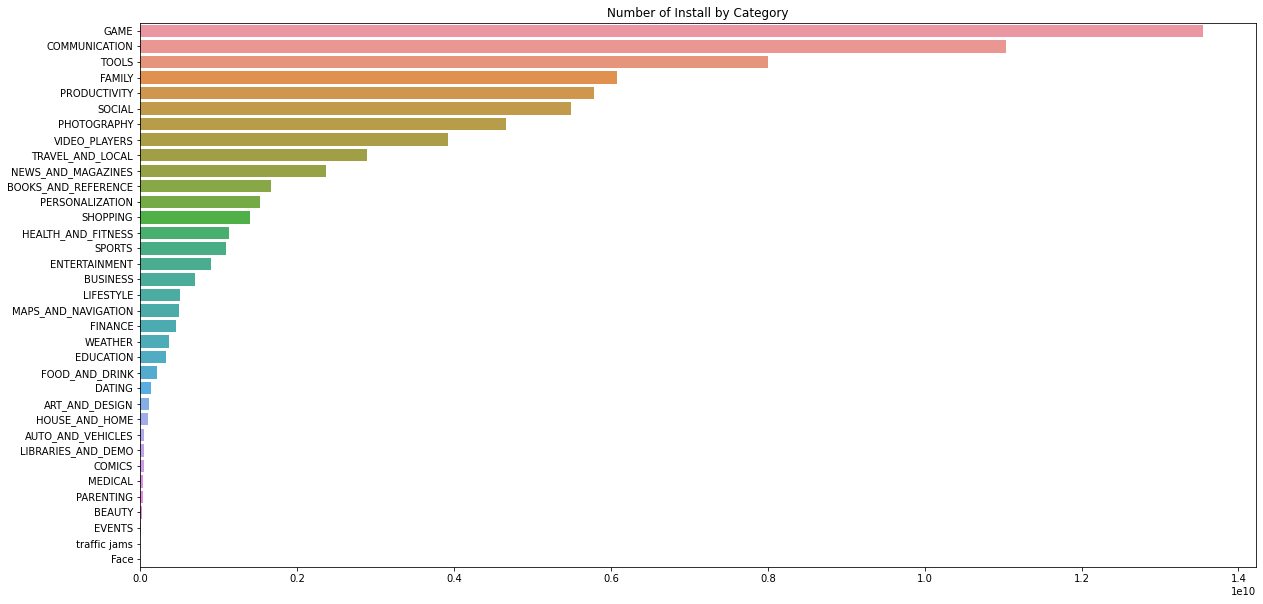

In [ ]:
installsbycategory1['Installs'] = installsbycategory1['Installs'].astype(int)
x = installsbycategory1['Category'].to_numpy()
y = installsbycategory1['Installs'].to_numpy()
plt.figure(figsize=(20,10))
sns.barplot(x = y, y = x, data = installsbycategory1).set(title="Number of Install by Category")

In [ ]:
installsbygenre = pdf.groupby('Genres')['Installs'].sum().reset_index()
installsbygenre1 = installsbygenre[['Genres', 'Installs']].sort_values(by='Installs', ascending=False).reset_index()
installsbygenre1

,index,Genres,Installs
0,102,Communication,11038276251
1,43,Tools,7992771915
2,62,Productivity,5788091369
3,52,Social,5487867902
4,74,Photography,4658147655
5,83,Video Players & Editors,3917002720
6,19,Arcade,3755129155
7,106,Action,3483039190
8,91,Casual,3042830740
9,9,Entertainment,3014714684


/usr/local/lib/python3.8/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_numpy` loads all data into the driver's memory. It should only be used if the resulting NumPy ndarray is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)
/usr/local/lib/python3.8/dist-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_numpy` loads all data into the driver's memory. It should only be used if the resulting NumPy ndarray is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)
/usr/local/lib/python3.8/dist-packages/pyspark/pandas/indexing.py:1362: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if label == key or label[0] == key:


[Text(0.5, 1.0, 'Number of Install by Genres')]

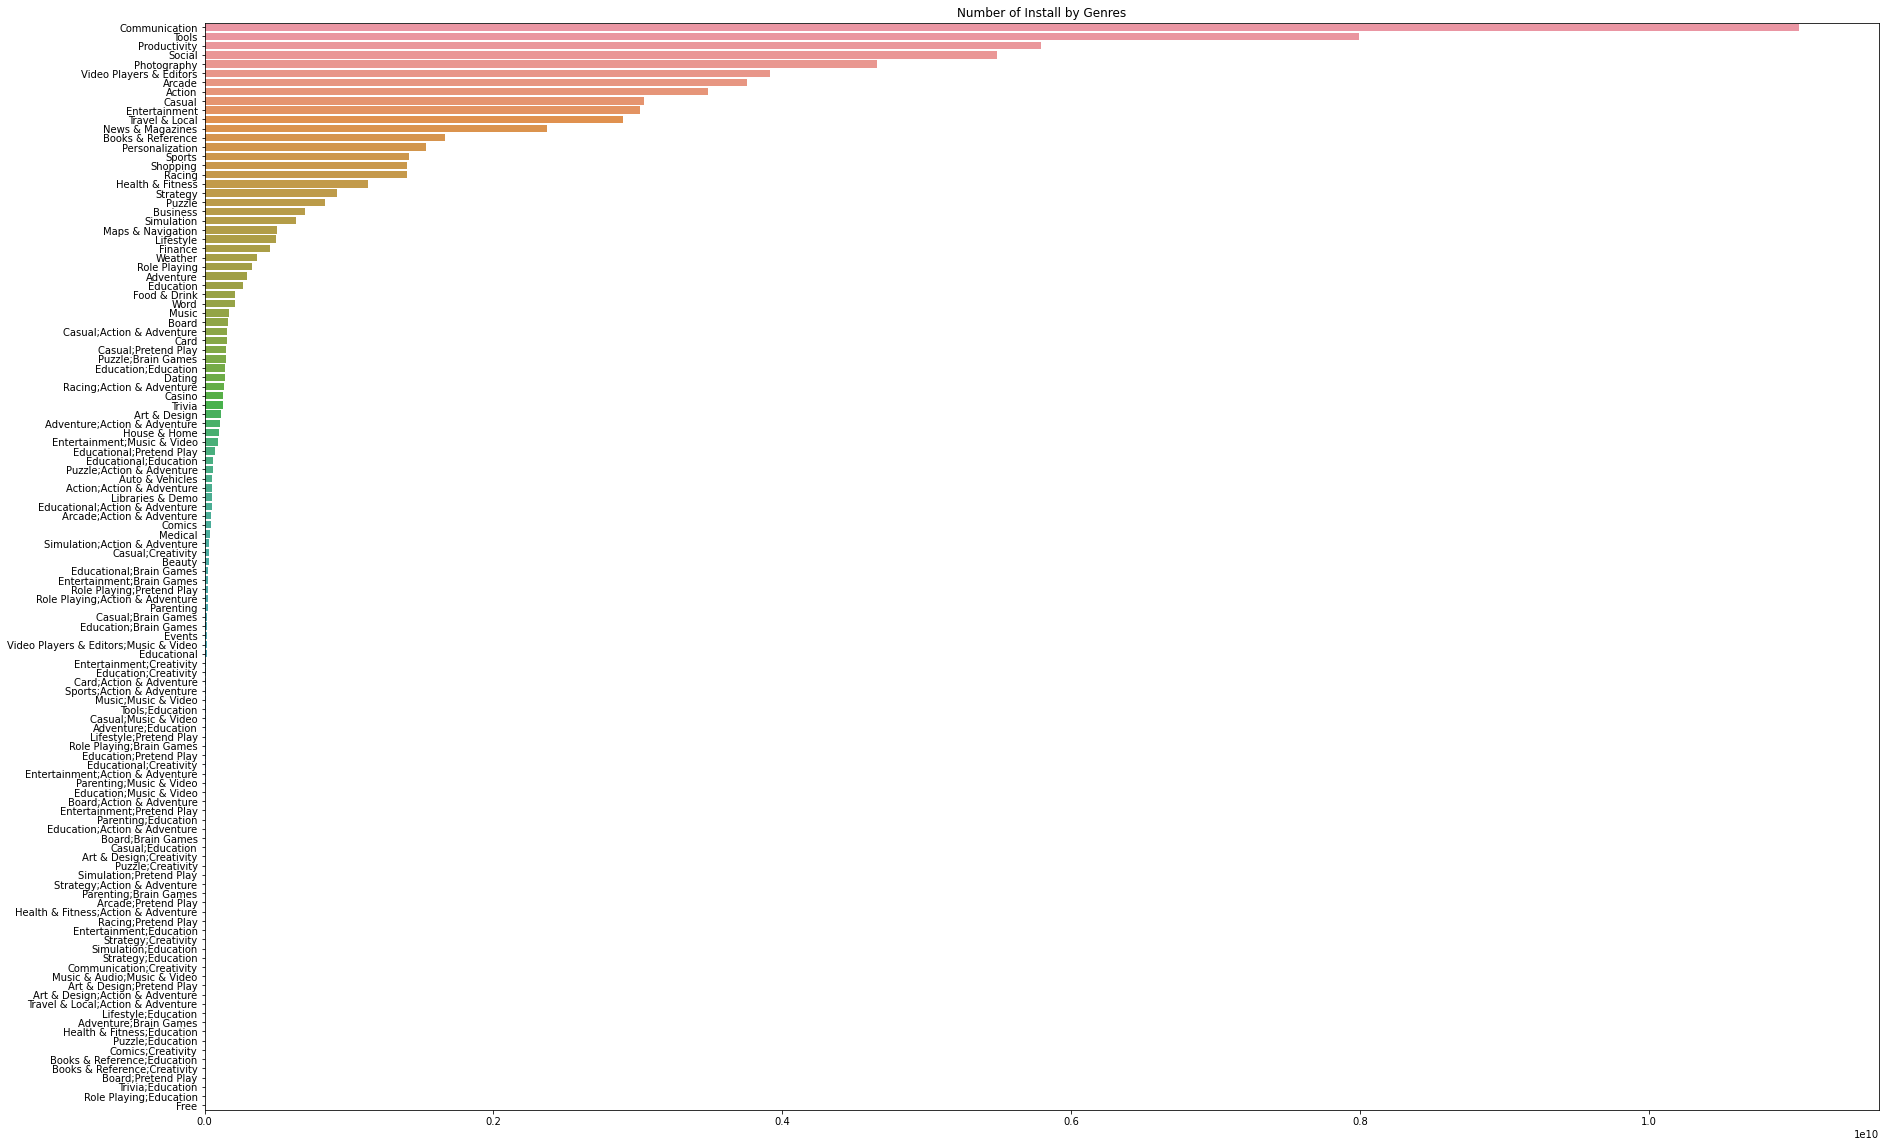

In [ ]:
installsbygenre1['Installs'] = installsbygenre1['Installs'].astype(int)
x = installsbygenre1['Genres'].to_numpy()
y = installsbygenre1['Installs'].to_numpy()
plt.figure(figsize=(30,20))
sns.barplot(x = y, y = x, data = installsbygenre1).set(title="Number of Install by Genres")